## ALGORITMO GENÉTICO
No problema da Mochila, temos uma lista de itens, cada um com um valor e um peso, e uma mochila que suporta até certo peso. Devemos escolher uma combinação de itens que tenha o maior valor possível sem ultrapassar o limite de peso.
Suponha que temos 8 itens em nossa lista. Neste exemplo, a mochila só pode receber uma unidade de cada item, embora existam variações do problema que permitem repetições. Cada indivíduo da população será representado por uma lista binária (Genoma) que indica os itens selecionados. Por exemplo: indivíduo 42: [1, 0, 0, 0, 1, 1, 0, 1]. Nesse caso, cada posição da lista corresponde a um item: o valor 1 indica que o item será levado, enquanto 0 indica que não será incluído na mochila.

In [2]:
# Bibliotecas
from random import getrandbits, randint, random, choice
import numpy as np
import math

In [3]:
# Individuo e População
def new_individual(number_of_items) :
  return [ getrandbits(1) for x in range(number_of_items) ] # Gera o individuo e a sua lista de binarios aleatorios correspondente a lista de itens

def new_population(numbers_of_individuals, number_of_items):
    return [ new_individual(number_of_items) for x in range(numbers_of_individuals) ] # Gera a população inicial

In [4]:
# Aptidao - Fitness || valida o individuo e calcula o valor da sua mochila
def fitness(individual, max_weight, weights_and_values):
    total_weight, total_value = 0, 0
    for index, value in enumerate(individual): # Ira analisar o Genoma do individuo
        total_weight += (individual[index] * weights_and_values[index][0]) # Adiciona à mochila o peso dos itens que constam no genoma
        total_value += (individual[index] * weights_and_values[index][1]) # Adiciona ao valor da mochila o valor dos itens que constam no genoma

    if (max_weight - total_weight) < 0: # Se o peso total ultrapassar o limite da mochila, o indivíduo é descartado
        return -1 
    return total_value

# Calcula o valor mínimo, máximo e a média dos valores da população
def average_fitness(population, max_weight, weights_and_values):
    values = list(fitness(x, max_weight, weights_and_values) for x in population if fitness(x, max_weight, weights_and_values) >= 0)
    minValue = min(values)
    maxValue = max(values)
    summed = sum(fitness(x, max_weight, weights_and_values) for x in population if fitness(x, max_weight, weights_and_values) >= 0)
    summed = summed / (len(population) * 1.0)
    return summed, minValue, maxValue

In [5]:
# Seleção dos indivíduos que passarão seus genes adiante
def roulette_selection(parents):
    
    # Gira a roleta para selecionar um indivíduo proporcional ao seu valor (fitness)
    def spin_roulette(total_fitness, index_to_ignore=-1):
        roulette, accumulated, randomly_chosen_value = [], 0, random()

        # Se for selecionar o segundo pai, remove o valor do primeiro da roleta
        if index_to_ignore != -1:
            total_fitness -= values[0][index_to_ignore]

        # Cria a roleta acumulada com base na proporção de valor
        for index, fitness_value in enumerate(values[0]):
            if index_to_ignore == index:
                continue
            accumulated += fitness_value
            roulette.append(accumulated / total_fitness)
            # Retorna o índice do indivíduo selecionado
            if roulette[-1] >= randomly_chosen_value:
                return index

    # Separa os valores (fitness) e os genomas dos pais
    values = list(zip(*parents))
    total_fitness = sum(values[0])  # Soma total dos valores

    father_index = spin_roulette(total_fitness)  # Seleciona o pai
    mother_index = spin_roulette(total_fitness, father_index)  # Seleciona a mãe, diferente do pai

    father = values[1][father_index]  # Obtém o genoma do pai
    mother = values[1][mother_index]  # Obtém o genoma da mãe

    return father, mother  # Retorna os dois pais selecionados

In [6]:
# Evolução da população
def evolve(population, max_weight, weights_and_values, chromosome_count, mutate=0.05):
    # Calcula o valor (fitness) de cada indivíduo e filtra apenas os válidos (com peso aceitável)
    parents = [[fitness(x, max_weight, weights_and_values), x] for x in population if fitness(x, max_weight, weights_and_values) >= 0]
    parents.sort(reverse=True)  # Ordena os pais do melhor para o pior

    # Reprodução
    children = []
    while len(children) < chromosome_count:
        father, mother = roulette_selection(parents)  # Seleciona dois pais
        middle = len(father) // 2  # Define o ponto de corte para o cruzamento
        child = father[:middle] + mother[middle:]  # Gera o filho com parte do pai e parte da mãe
        children.append(child)  # Adiciona o novo indivíduo à nova geração

    # Mutação
    for individual in children:
        if mutate > random():  # Com uma certa probabilidade, realiza mutação
            position_to_mutate = randint(0, len(individual) - 1)  # Escolhe uma posição aleatória
            # Inverte o valor do gene (0 vira 1 e vice-versa)
            if individual[position_to_mutate] == 1:
                individual[position_to_mutate] = 0
            else:
                individual[position_to_mutate] = 1

    return children  # Retorna a nova geração


In [7]:
# Parâmetros do problema

# Lista com o peso e valor de cada item disponível
weights_and_values = [[4, 30], [8, 10], [8, 30], [25, 75], [2, 10], [50, 100], [6, 300], [12, 50], [100, 400], [8, 300]]

# Peso máximo que a mochila pode carregar
max_weight = 100

# Quantidade de indivíduos em cada geração (população)
chromosome_count = 20

# Número total de gerações que o algoritmo vai simular
generations = 80

# Número de itens disponíveis (também é o tamanho do genoma)
item_count = len(weights_and_values)


In [8]:
# Execução das etapas do algoritmo genético

# Cria a população inicial com indivíduos aleatórios
population = new_population(chromosome_count, item_count)

# Guarda o valor médio de fitness da população inicial
fitness_history = [average_fitness(population, max_weight, weights_and_values)]

# Executa o processo de evolução por um número definido de gerações
for i in range(generations):
    # Gera uma nova população evoluída a partir da atual
    population = evolve(population, max_weight, weights_and_values, chromosome_count)
    
    # Armazena o valor médio de fitness da nova geração
    fitness_history.append(average_fitness(population, max_weight, weights_and_values))

In [9]:
fitness_history[0]

(158.25, 10, 525)

Apartir daqui, essa parte de exibição, eu não mexi.

In [ ]:
# Histórico das Gerações
for index, data in enumerate(fitness_history):
    print("Geração:", index, " | Média do valor da Mochila:", data[0], "| Mínimo do valor da Mochila: ", data[1], "| Máximo do valor da Mochila: ", data[2])

Geração: 0  | Média do valor da Mocilha: 158.25 | Mínimo do valor da Mochila:  10 | Máximo do valor da Mochila:  525
Geração: 1  | Média do valor da Mocilha: 345.0 | Mínimo do valor da Mochila:  100 | Máximo do valor da Mochila:  535
Geração: 2  | Média do valor da Mocilha: 438.0 | Mínimo do valor da Mochila:  100 | Máximo do valor da Mochila:  535
Geração: 3  | Média do valor da Mocilha: 457.25 | Mínimo do valor da Mochila:  215 | Máximo do valor da Mochila:  535
Geração: 4  | Média do valor da Mocilha: 451.25 | Mínimo do valor da Mochila:  400 | Máximo do valor da Mochila:  535
Geração: 5  | Média do valor da Mocilha: 532.25 | Mínimo do valor da Mochila:  400 | Máximo do valor da Mochila:  805
Geração: 6  | Média do valor da Mocilha: 509.25 | Mínimo do valor da Mochila:  475 | Máximo do valor da Mochila:  805
Geração: 7  | Média do valor da Mocilha: 480.25 | Mínimo do valor da Mochila:  460 | Máximo do valor da Mochila:  815
Geração: 8  | Média do valor da Mocilha: 518.75 | Mínimo do

In [11]:
# Condições e solução
print("\nPeso Máximo:", max_weight, "g\n\nItens:")
for index, item in enumerate(weights_and_values):
    print("Item", index + 1, ": ", item[0], "g | $", item[1])

print("\nExemplos de uma boa solução:")
for i in range(5):
    print(population[i])


Peso Máximo: 100 g

Itens:
Item 1 :  4 g | $ 30
Item 2 :  8 g | $ 10
Item 3 :  8 g | $ 30
Item 4 :  25 g | $ 75
Item 5 :  2 g | $ 10
Item 6 :  50 g | $ 100
Item 7 :  6 g | $ 300
Item 8 :  12 g | $ 50
Item 9 :  100 g | $ 400
Item 10 :  8 g | $ 300

Exemplos de uma boa solução:
[1, 0, 0, 1, 0, 1, 1, 0, 0, 1]
[1, 0, 0, 1, 0, 1, 1, 0, 0, 1]
[1, 0, 0, 1, 0, 1, 1, 0, 0, 1]
[1, 0, 0, 1, 0, 1, 1, 0, 0, 1]
[1, 0, 0, 1, 0, 1, 1, 0, 0, 1]


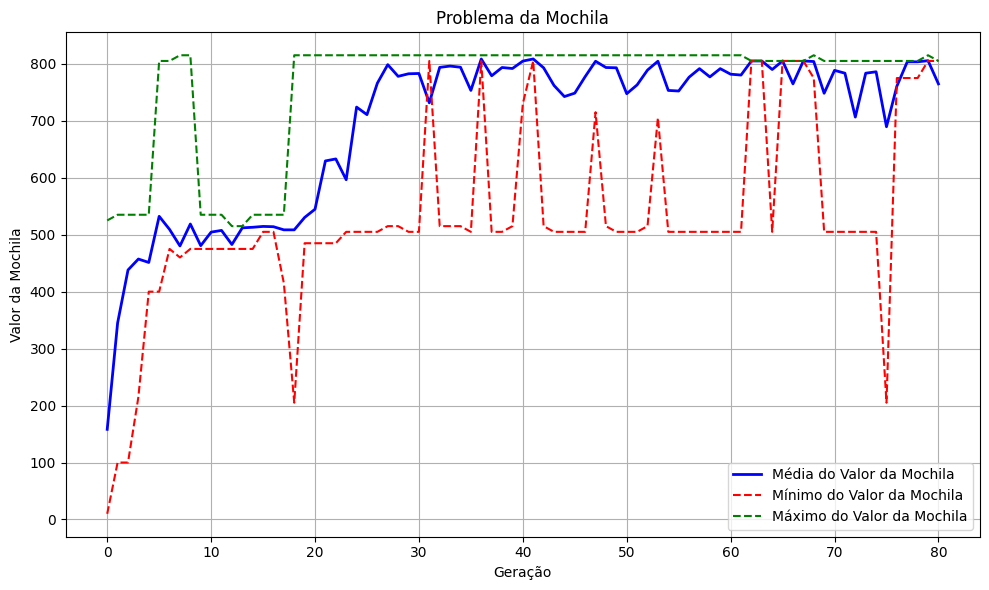

In [21]:
from matplotlib import pyplot as plt

# Converte para listas separadas
medias = [linha[0] for linha in fitness_history]
minimos = [linha[1] for linha in fitness_history]
maximos = [linha[2] for linha in fitness_history]

plt.figure(figsize=(10, 6))

# Plota cada linha com rótulo
plt.plot(medias, label='Média do Valor da Mochila', color='blue', linewidth=2)
plt.plot(minimos, label='Mínimo do Valor da Mochila', color='red', linestyle='--')
plt.plot(maximos, label='Máximo do Valor da Mochila', color='green', linestyle='--')

plt.grid(True, zorder=0)
plt.title("Problema da Mochila")
plt.xlabel("Geração")
plt.ylabel("Valor da Mochila")
plt.legend()  # Mostra legenda
plt.tight_layout()  # Ajusta layout
plt.show()